In [60]:
import matplotlib.pyplot as plt

In [61]:
import numpy as np

In [62]:
import pandas as pd

In [63]:
rohdaten = np.load("I:/Messwerte/messwerte.npy")

In [64]:
df = pd.DataFrame(rohdaten, columns = ['t', 'action_index', 'reward', 'epsilon', 'oldTheta1State', 'oldTheta2State',
                                       'currentTheta1State', 'currentTheta2State', 'totalreward',
                                       'temporal_difference', 'new_q_value', 'theta1CurrentAngle', 'theta2CurrentAngle', 'distance'])

In [65]:
df.head()

,t,action_index,reward,epsilon,oldTheta1State,oldTheta2State,currentTheta1State,currentTheta2State,totalreward,temporal_difference,new_q_value,theta1CurrentAngle,theta2CurrentAngle,distance
0,0.0,3.0,0.0,1.1000,1.0,3.0,1.0,2.0,0.0,-1.0,9.1,128.0,56.0,0.0
1,1.0,2.0,0.0,1.0998,1.0,2.0,1.0,3.0,0.0,-1.0,9.1,128.0,84.0,0.0
2,2.0,2.0,0.0,1.0996,1.0,3.0,1.0,4.0,0.0,-1.0,9.1,128.0,112.0,0.0
3,3.0,2.0,0.0,1.0994,1.0,4.0,1.0,5.0,0.0,-1.0,9.1,128.0,140.0,0.0
4,4.0,0.0,0.0,1.0992,1.0,5.0,2.0,5.0,0.0,-1.0,9.1,136.0,140.0,0.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   t                    500 non-null    float64
 1   action_index         500 non-null    float64
 2   reward               500 non-null    float64
 3   epsilon              500 non-null    float64
 4   oldTheta1State       500 non-null    float64
 5   oldTheta2State       500 non-null    float64
 6   currentTheta1State   500 non-null    float64
 7   currentTheta2State   500 non-null    float64
 8   totalreward          500 non-null    float64
 9   temporal_difference  500 non-null    float64
 10  new_q_value          500 non-null    float64
 11  theta1CurrentAngle   500 non-null    float64
 12  theta2CurrentAngle   500 non-null    float64
 13  distance             500 non-null    float64
dtypes: float64(14)
memory usage: 54.8 KB


In [67]:
df.describe()

,t,action_index,reward,epsilon,oldTheta1State,oldTheta2State,currentTheta1State,currentTheta2State,totalreward,temporal_difference,new_q_value,theta1CurrentAngle,theta2CurrentAngle,distance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,249.500000,1.358000,6.880000,0.530502,3.400000,3.114000,3.406000,3.116000,-37.060000,23.52480,105.248320,147.248000,87.24800,-3.702000
std,144.481833,1.115493,74.805463,0.483493,1.440886,1.461943,1.437113,1.462471,1276.127328,76.60145,126.504819,11.496906,40.94919,127.608421
min,0.000000,0.000000,-270.000000,0.000224,0.000000,0.000000,0.000000,0.000000,-1600.000000,-221.00000,-188.900000,120.000000,0.00000,-160.000000
25%,124.750000,0.000000,0.000000,0.028612,3.000000,2.000000,3.000000,2.000000,-760.000000,-1.00000,9.000000,144.000000,56.00000,-76.000000
50%,249.500000,1.000000,0.000000,0.407020,4.000000,3.000000,4.000000,3.000000,-475.000000,0.00000,63.040000,152.000000,84.00000,-47.500000
75%,374.250000,2.000000,0.000000,1.075040,5.000000,4.000000,5.000000,4.000000,760.000000,23.62500,187.107500,160.000000,112.00000,76.000000
max,499.000000,3.000000,260.000000,1.100000,5.000000,5.000000,5.000000,5.000000,3440.000000,471.50000,540.940000,160.000000,140.00000,344.000000


<function matplotlib.pyplot.show(*args, **kw)>

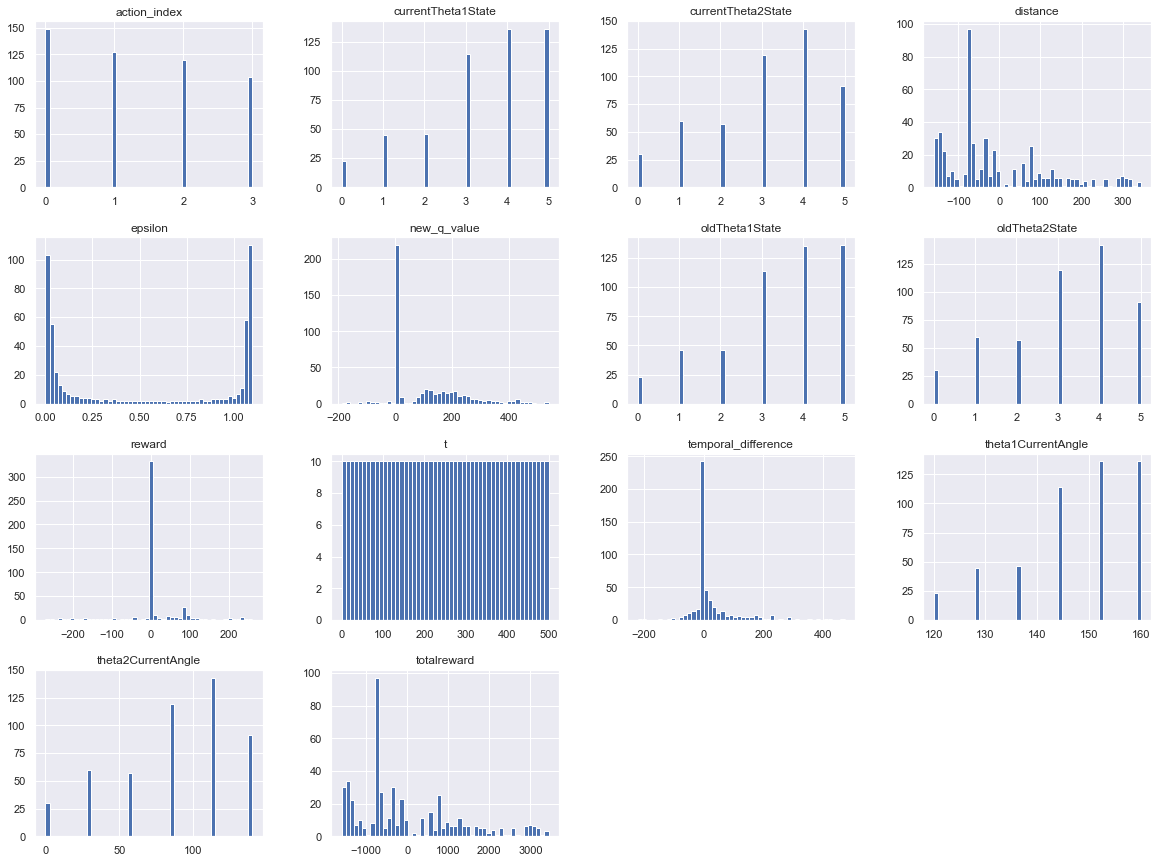

In [68]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


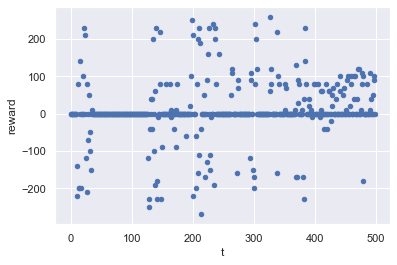

In [69]:
df.plot(kind="scatter", x="t", y="reward")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


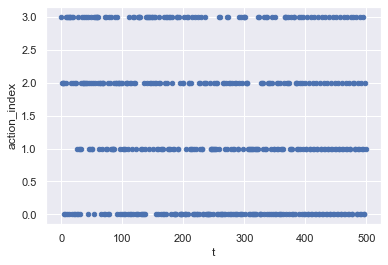

In [70]:
df.plot(kind="scatter", x="t", y="action_index")

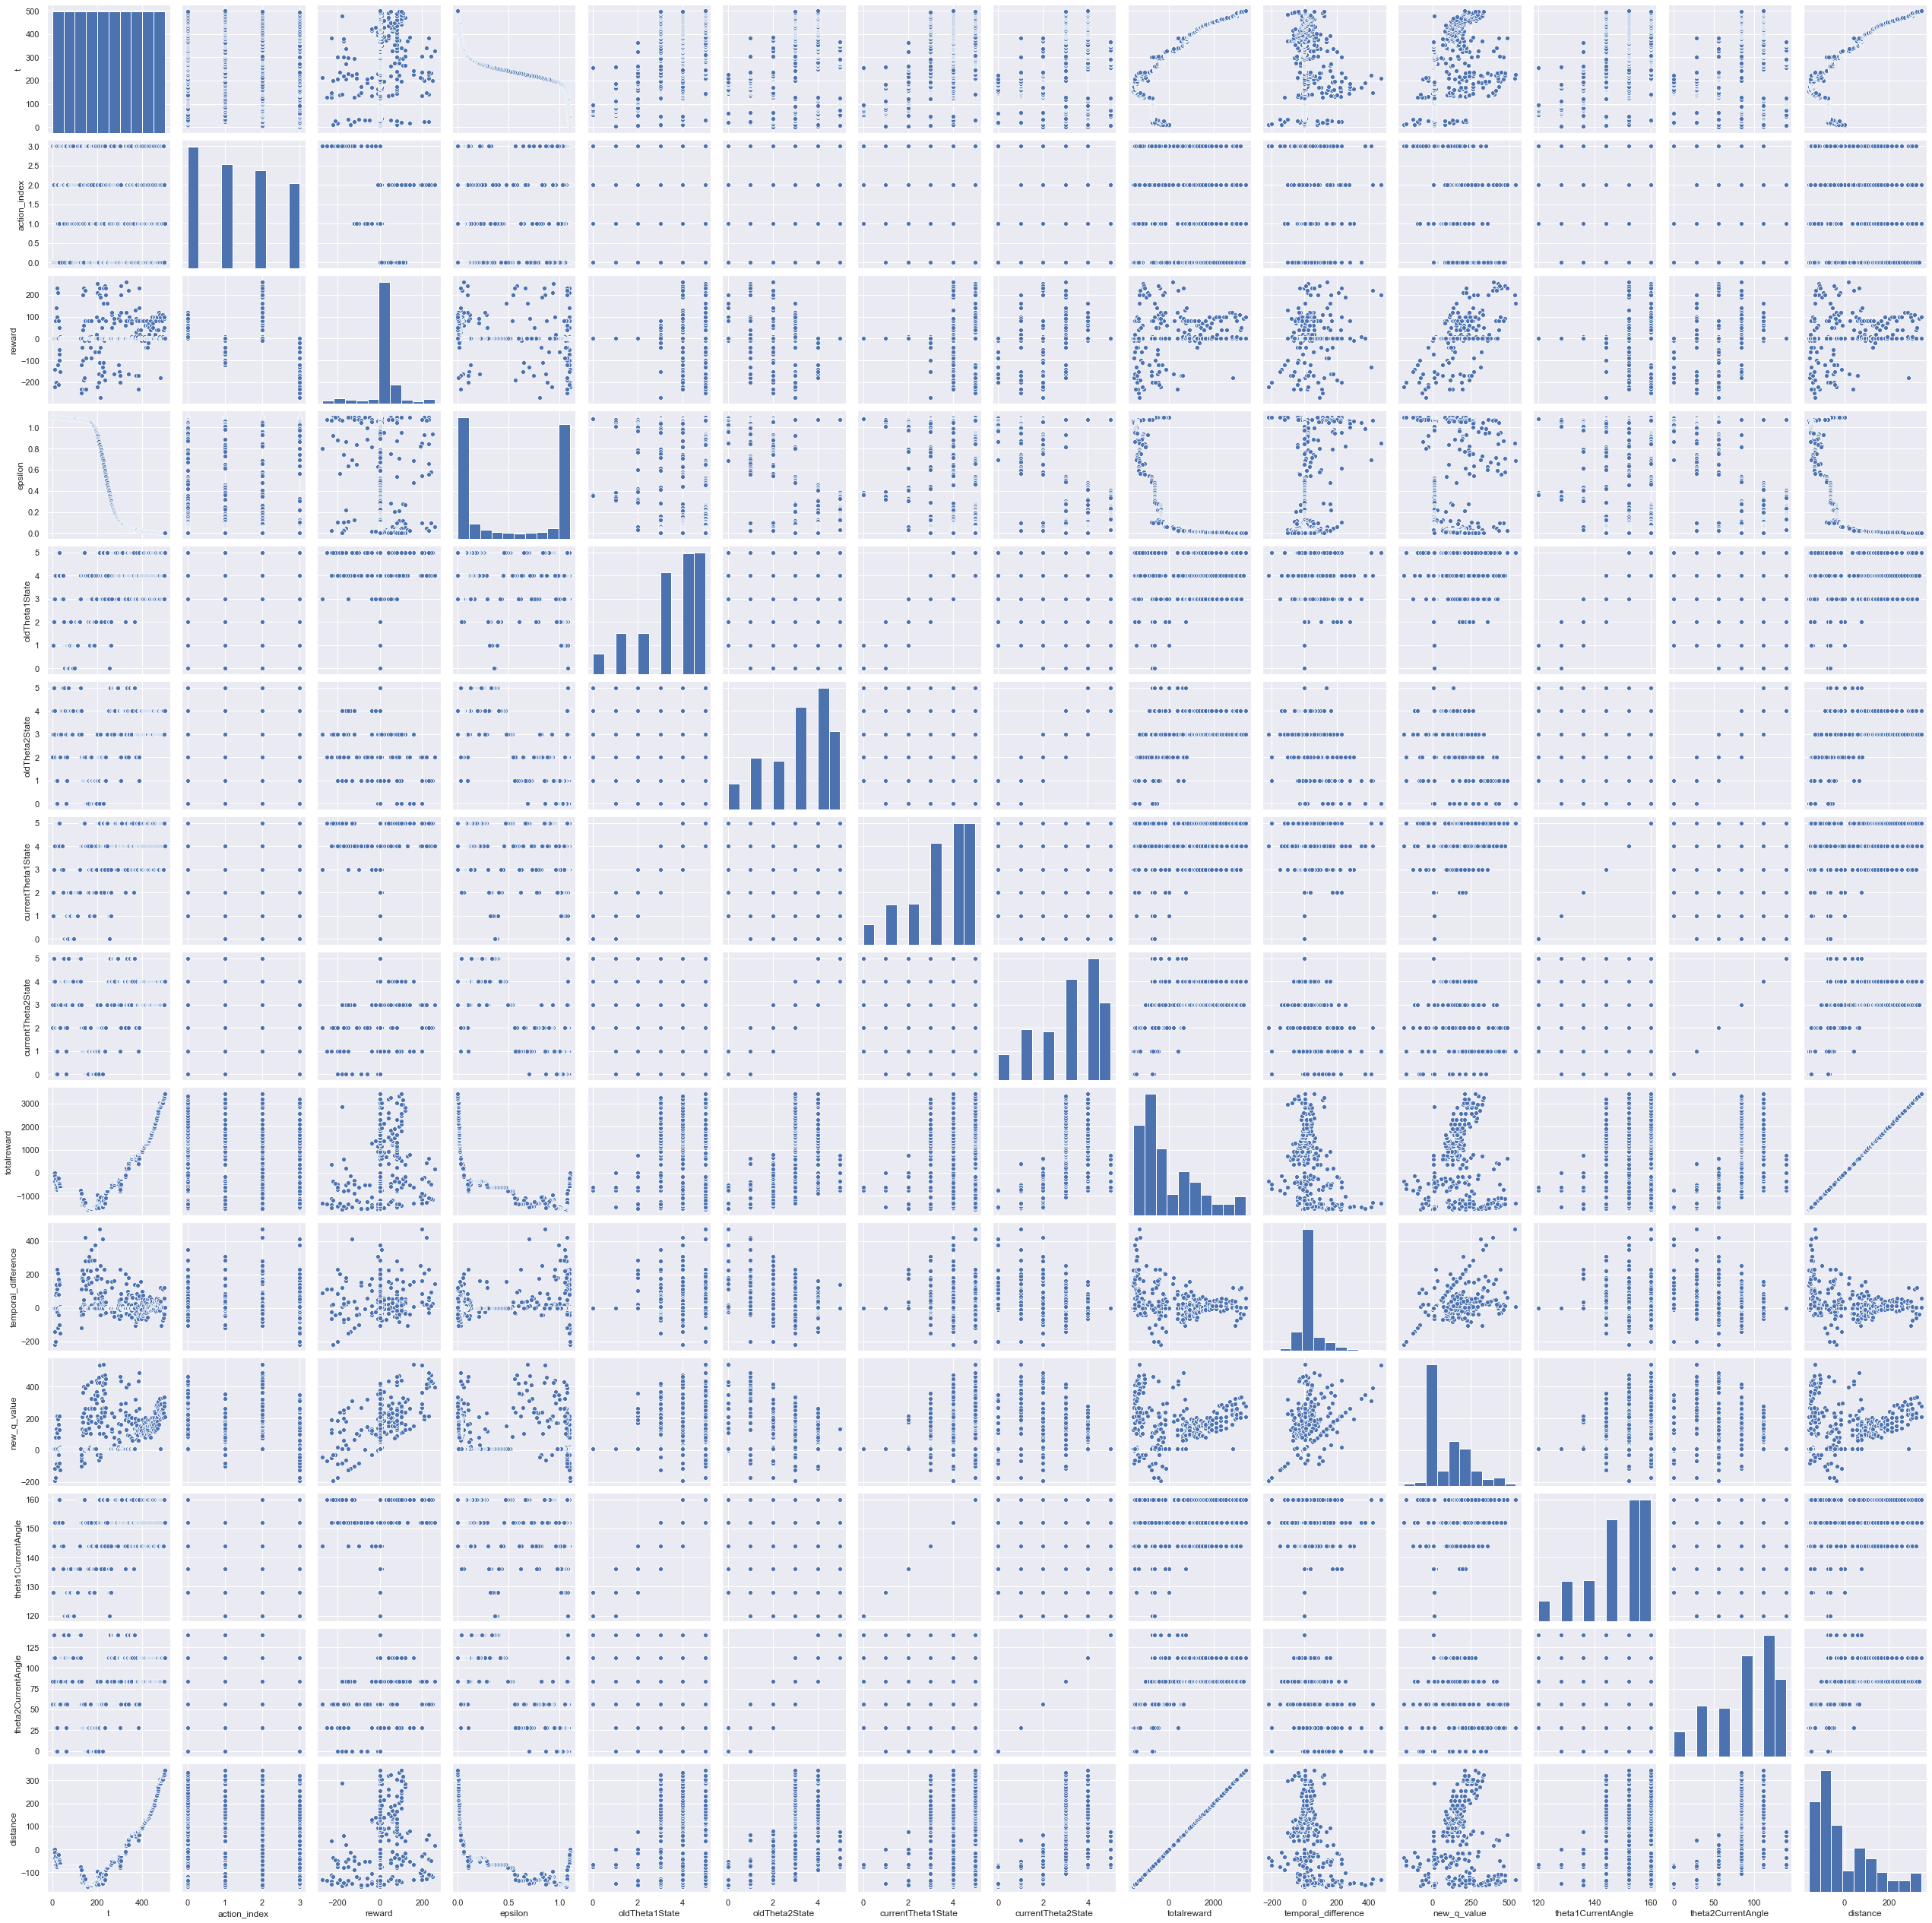

In [71]:
import seaborn as sns
sns.pairplot(df)
plt.show()

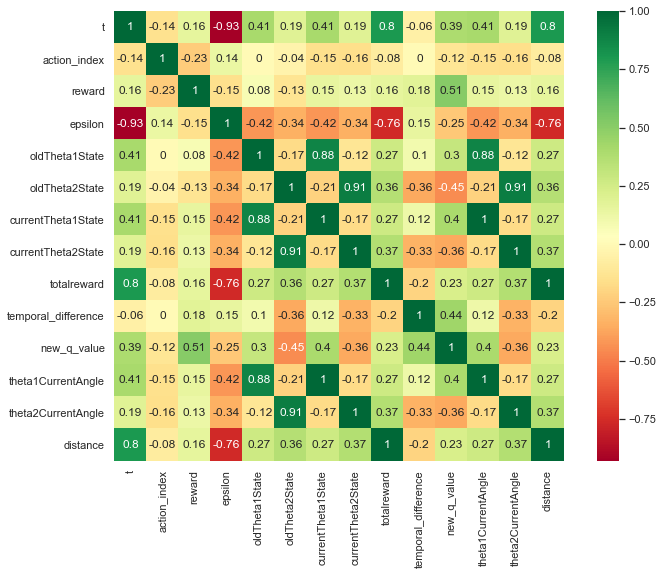

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr().round(2), square=True, cmap='RdYlGn', annot=True)


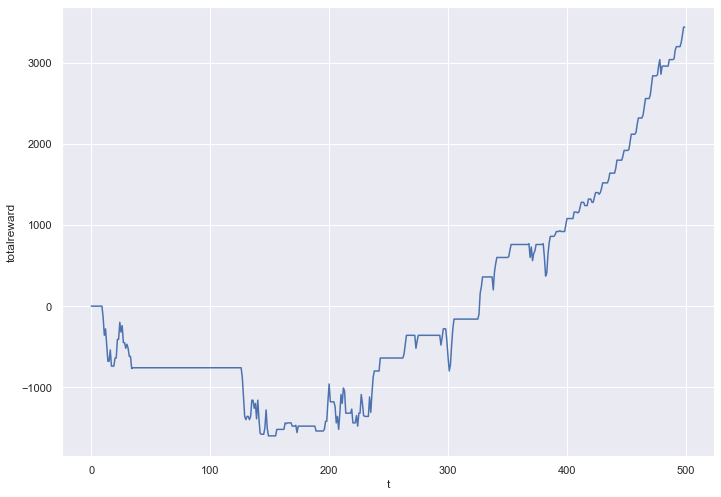

In [73]:
import seaborn as sns
sns.lineplot(x="t", y="totalreward", data=df)

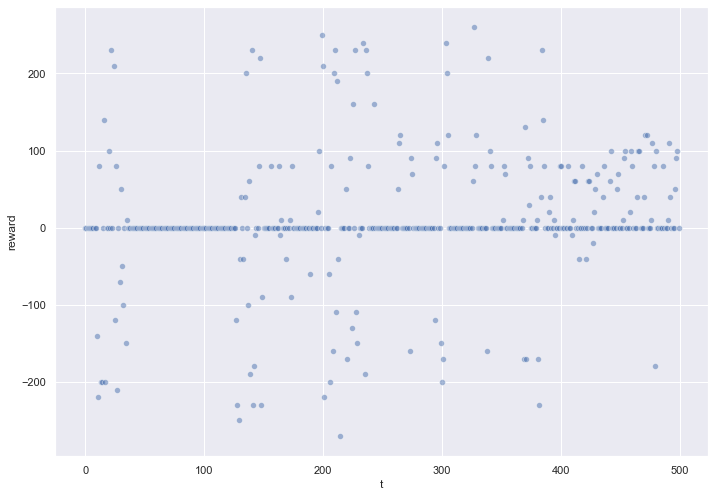

In [74]:
import seaborn as sns
sns.scatterplot(x="t", y="reward", data=df, alpha=0.5)

In [76]:
rohdaten_single_last_qtable = np.load("I:/Messwerte/qtables/499-qtable.npy")

In [77]:
df = pd.DataFrame(rohdaten_single_last_qtable)

ValueError: Must pass 2-d input